# Les données structurées au format CSV



1. Lecture
2. Requêtes
3. Tris



**Définition wiki** : Comma-separated values, connu sous le sigle CSV, est un format texte ouvert représentant des données tabulaires sous forme de valeurs séparées par des virgules. 
Un fichier CSV est un fichier texte, par opposition aux formats dits « binaires ». Chaque ligne du texte correspond à une ligne du tableau et les virgules correspondent aux séparations entre les colonnes. Les portions de texte séparées par une virgule correspondent ainsi aux contenus des cellules du tableau. Une ligne est une suite ordonnée de caractères terminée par un caractère de fin de ligne (line break – LF ou CRLF), la dernière ligne pouvant en être exemptée.


**Intro** : Pour nos premiers pas avec csv, nous allons utiliser des données très simples au format CSV : ces données sont contenues dans le fichier à télécharger: [personnes.csv](https://drive.google.com/file/d/1feD9WnZdobmybqzUbIIr0mXH0OPk7nY2/view?usp=sharing) 

Importez ce fichier dans le meme dossier que ce notebook. On l'ouvrira avec le bloc-notes ou notepad++ 


Après avoir découvert le format CSV, nous allons maintenant, à l'aide de Python, apprendre à effectuer des traitements sur ces données.  

Pour traiter des données, nous allons utiliser la bibliothèque Python csv et nous n'utiliserons pas le tableur.

# (1ère partie) Lecture d'un fichier csv

## Méthode avec csv.reader
a) Lire et comprendre le fichier csv comme une liste de listes

Après avoir importé dans la session le fichier `personnes.csv`, exécutez le code ci-dessous

In [2]:
import csv
with open('personnes.csv', mode = "r" , newline = '') as csvFile :
    fichier_lu = csv.reader(csvFile)
    for ligne in fichier_lu:
        print(ligne)
    lu = [ligne for ligne in fichier_lu]

# voyons le résutat :
print(lu)
    
    

['nom', 'prenom', 'age']
['Durand', 'Jean-Pierre', '32']
['Dupont', 'Christophe', '51']
['Terta', 'Henry', '37']
['Kapri', 'Leon', '45']
['Lenard', 'Georges', '15']
['Herpan', 'stephan', '22']
['Mastic', 'Brice', '61']
['Pouyeau', 'Maxime', '27']
['Arox', 'Gilles', '51']
['Follin', 'Paul', '32']
[]


Le code ci-dessus est très simple :  
  
- **import** Avec la première ligne, nous importons la bibliothèque `csv`.
- **open** ouvre le fichier en lecture (mode = "r" pour read) -> cvsFile (objet de type objFile)
- **initialisation** du lecteur (reader) de csvFile.
- **lecture ligne par ligne** la boucle for permet d'énumérer les différentes lignes de csvFile.

La première liste affichée correspondant au nom des entêtes des colonnes.

**Exercice** Ecrire une fonction qui lit un fichier et renvoie la liste de listes

In [5]:
def readCSV(filename) :
    with open(filename, mode = "r" , newline = '') as csvFile :
        reader = csv.reader(csvFile)
        lu = [ligne for ligne in reader]
    return lu

Ecrire un code qui lit les 10 premiers ligne du csv top14

In [6]:
import csv
with open('top14.csv', mode = "r" , newline = '', encoding = 'utf-8') as csvFile :
    reader = csv.reader(csvFile)
    ligne_csv = [ligne for ligne in reader]
    for i in range(10):
        print(ligne_csv[i])
        

['Equipe', 'Nom', 'Poste', 'Date de naissance', 'Taille', 'Poids']
['Agen', 'Anton PEIKRISHVILI', 'Pilier', '18/09/1987', '183', '122']
['Agen', 'Dave RYAN', 'Pilier', '21/04/1986', '183', '116']
['Agen', 'Giorgi TETRASHVILI', 'Pilier', '31/08/1993', '177', '112']
['Agen', 'Kamaliele TUFELE', 'Pilier', '11/10/1995', '182', '123']
['Agen', 'Malino VANAÏ', 'Pilier', '04/05/1993', '183', '119']
['Agen', 'Morgan PHÉLIPPONNEAU', 'Pilier', '05/09/1989', '185', '106']
['Agen', 'Walter DESMAISON', 'Pilier', '18/10/1991', '188', '119']
['Agen', 'Clément MARTINEZ', 'Talonneur', '14/03/1996', '181', '105']
['Agen', 'Marc BARTHOMEUF', 'Talonneur', '19/07/1991', '174', '100']


## Méthode avec csv.DictReader

In [7]:
[{"nom":"Durand","prénom":"Jean-Pierre","age":32},{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}]

[{'nom': 'Durand', 'prénom': 'Jean-Pierre', 'age': 32},
 {'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}]

### Lire et comprendre le fichier csv en utilisant une liste de dictionnaires

In [10]:
import csv
with open('personnes.csv', mode = "r" , newline = '',encoding="utf-8") as csvFile :
    reader = csv.DictReader(csvFile)
    
    lu = [dict(ligne) for ligne in reader]

# voyons le résutat :
print(lu)

[{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}, {'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}, {'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}, {'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}, {'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}, {'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}, {'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}, {'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}, {'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}, {'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}]


ecrire un code pour trouver le prénom de celui qui s'appelle 'Arox'

In [9]:
for element in lu:
    if element['nom']=='Arox':
        print(element['prenom'])

Gilles


Ecrire (en compréhension) la liste des noms des personnes ayant plus de 45 ans

In [11]:
lst1=[element['nom'] for element in lu if int(element["age"])>=45]

['Dupont', 'Kapri', 'Mastic', 'Arox']

Ecrire la liste des ages des personnes aynat un 't' dans leur prénom

In [14]:
lst2=[int(element['age']) for element in lu if 't' in element['prenom']]
print(lst2)

[51, 22]


 Plutôt qu’une liste de listes, une instruction permet d’obtenir chaque enregistrement au format dictionnaire : **dict**.


```
On obtient ainsi une liste de dictionnaires, à savoir :
	listeDico = [ {clé1:enr1_val1, clé2:enr1_val2, …},
	  {clé1:enr2_val1, clé2:enr2_val2, …},
	  {clé1:enr3_val1, clé2:enr3_val2, …} ]
```

Une telle structure est mieux adaptée. D'une part, les en-tête ne sont plus lus comme une ligne banale mais sont utilisées comme clefs dans les dictionnaires. D'autre part, chaque élément *listeDico[i]* est un dictionnaire et il sera plus facile de manipuler :
```
listeDico[i] = {'classe':'TG1' , 'nb_elev':'34', 'nb_garçons':'16' , 'nb_filles':'18' , 'nb_admis':'33', …}
plutôt que  : listeDico[i] = ['TG1','34',  16 ,  18 , '33', …]
```

Dans un fichier avec beaucoup de colonnes, il est assez fastidieux de se souvenir a quoi correspond l'indice d'une colonne. dans l'exemple, *listeDico[i][3]* est le nombre de filles, tandis que avec le dictionnaire on écrira *listeDico[i]['nb_filles']*. Et imaginez quand il y a beaucoup de colonnes, comme il est difficile de retrouver quel indice de colonne correspond à quoi...



### Ecrire une fonction qui lit un fichier et renvoie la liste de dictionnaires

In [16]:
def readCSV(filename) :
    with open(filename, mode = "r" , newline = '') as csvFile :
        reader = csv.DictReader(csvFile)
        #print(list(reader))
        lu = [dict(ligne) for ligne in reader]
    return lu

In [17]:
personnes = readCSV('personnes.csv')
print(personnes)


[{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}, {'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}, {'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}, {'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}, {'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}, {'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}, {'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}, {'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}, {'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}, {'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}]


<center><font size="5" color="darkyellow">RETENIR</font>

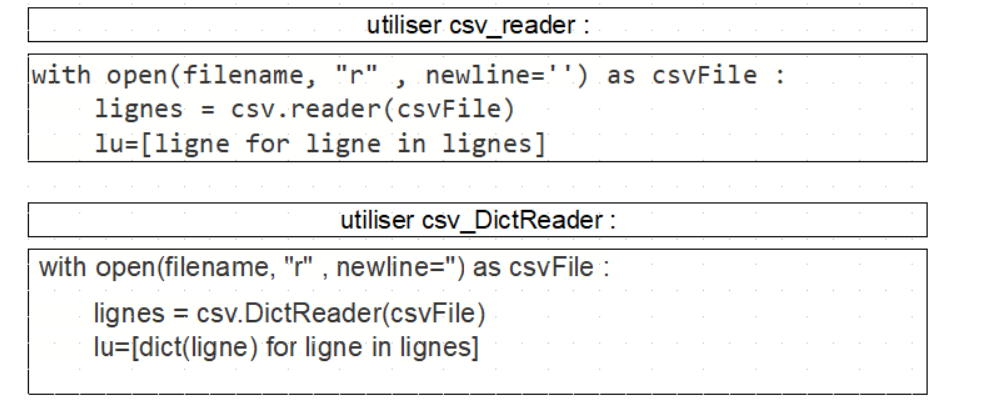

Quelle est la différence entre `csv.reader(mon_fichier)` et `csv.DictReader(mon_fichier)` ?

Réponse : 

## Extraire des données suivant certains critères

Nous désirons sélectionner des données suivant un certain critère, par exemple trouver tous les renseignements de M. Herpan, ou trouver toutes les personnes âgées de moins de 30 ans... Quelle syntaxe allons-nous choisir?

### Trouver tous les renseignements des personnes portant le nom "Lenard"

In [17]:
infos = [p for p in personnes if p['nom'] == 'Lenard']
for elem in infos :
    print(elem)

{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}


### Trouver tous les renseignements des personnes âgées de plus de 30 ans

In [ ]:
plus30 = [p for p in personnes if int(p['age']) >30]
for pers in plus30 :
    print(pers)

{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}


### afficher les noms et prénoms des personnes de plus de 30 ans

In [21]:
nom_prenom_plus30=[(element['nom'],element['prenom']) for element in personnes if int(element['age'])>30]

print(nom_prenom_plus30)

[('Durand', 'Jean-Pierre'), ('Dupont', 'Christophe'), ('Terta', 'Henry'), ('Kapri', 'Leon'), ('Mastic', 'Brice'), ('Arox', 'Gilles'), ('Follin', 'Paul')]


### afficher les noms et prénoms des personnes dont le nom commence par M

In [23]:
nom_preno_M=[(element['nom'],element['prenom']) for element in personnes if 'M' == element['nom'][0]]
print(nom_preno_M)

[('Mastic', 'Brice')]


### afficher l'age moyen des personnes dans le fichier

In [27]:
age_perso=[int(element['age']) for element in personnes]
print(sum(age_perso)/len(age_perso))


37.3


### afficher tous les noms en ordre alphabétique

In [35]:
r=""
lst=[element['nom'] for element in personnes]

lst.sort() # tri la liste
print(lst)

lst2=sorted(lst) # ne touche pas la liste lst
print(lst2)

['Arox', 'Dupont', 'Durand', 'Follin', 'Herpan', 'Kapri', 'Lenard', 'Mastic', 'Pouyeau', 'Terta']


### afficher toutes les informations en triant les noms en ordre alphabétique


In [ ]:
# une première solution : extraires les noms, trier la liste, puis
# parcourir la liste pour récuppérer et afficher les infos...
# mais....

# essayez...

{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}
{'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}


Vous remarquez qu'on a doublonné Lenard Michel et Georges...

Tout ceci est un peu fastidieux et ce n'est pas la bonne méthode pour trier nos données, mais pour vous en convaincre il fallait commencer ainsi...

Nous allons voir dans la deuxième partie la bonne façon d'opérer des tris.



## Trier les données suivant certaines colonnes


### Tri sur un unique critère

Reprenons notre tableau initial, nommé personnes :

In [ ]:
personnes = readCSV('personnes.csv')

Trier ce tableau avec personnes.sort() n'aurait aucun sens et provoque une erreur :

In [ ]:
personnes.sort()

TypeError: ignored

Comprenons bien ceci :
<font color="#ee3333">TypeError:</font> '<' not supported between instances of 'dict' and 'dict'

❓ Que nous dit l'interpréteur ?

Pour trier, il faut faire des comparaisons entre les éléments. Or ici, nos éléments sont des dictionnaires. 
'<' n'est pas possible entre *dict* et *dict*  : on ne peut comparer deux dictionnaires.

Et c'est assez logique, comment comparer Durand Jean-Pierre 32 ans et Tetra Henry 37 ans ? sur l'age ? le nom ? Nous n'avons pas précisé !

C'est ce que nous allons faire en définissant une 🔑 clé de tri
<center><font color="darkyellow" size="5">RETENIR</font></center>

```
Une clé est une fonction qui reçoit en argument un dictionnaire et renvoie la valeur associée à une clé du dictionnaire.

    def ma_fonction ( dictionnaire )  :
            return dictionnaire['en_tete_colonne']

Cette fonction sera associée à l’argument key de la méthode sort() : 

	personnes.sort ( key = ma_fonction ) # Notez que key prend pour valeur le nom de la fonction sans les parenthèses.
```



In [ ]:
# Créez  2 clés avec notre dictionnaire

def cle_age(dico) :
    pass

def cle_nom(dico) :
    pass

In [ ]:
# Faire un tri par age :

for p in personnes :
    print(p)

In [ ]:
# ou par age décroissant :


for p in personnes :
    print(p)

In [ ]:
# ou par noms :


for p in personnes :
    print(p)



---

<center><font color="orange" size="6"><b>IV. TP récapitulatif</b></font></center>


---



<font color="orange" size="5"><b><center>Première partie : requêtes et tris</center></b></font>

Dans cette première partie, nous allons procéder comme dans l'exemple précédent.

⏬ Téléchargez maintenant le fichier [villes.csv](https://drive.google.com/file/d/1Zi_spru-r9J1TMTiT8lw18wTNya8hClw/view?usp=sharing) puis importez le dans la session. Il est trop volumineux pour un affichage rapide.... vous allez devoir travailler dessus pour savoir ce qu'il contient !

<font color="orange" size="4">➽ Modifier le code pour lire villes.csv et  créer la liste <u>*villes*</u> en utilisant une liste en compréhension :</font>

In [37]:
import csv
with open('villes.csv', mode = "r" , newline = '',encoding="utf-8") as csvFile :
    reader = csv.DictReader(csvFile)
    
    villes = [dict(ligne) for ligne in reader]

# voyons le résutat :
for i in range(10):
    print(villes[i])


{'dep': '1', 'nom': 'Ozan', 'cp': '1190', 'nb_hab_2010': '618', 'nb_hab_1999': '469', 'nb_hab_2012': '500', 'dens': '93', 'surf': '6.6', 'long': '4.91667', 'lat': '46.3833', 'alt_min': '170', 'alt_max': '205'}
{'dep': '1', 'nom': 'Cormoranche-sur-Saône', 'cp': '1290', 'nb_hab_2010': '1058', 'nb_hab_1999': '903', 'nb_hab_2012': '1000', 'dens': '107', 'surf': '9.85', 'long': '4.83333', 'lat': '46.2333', 'alt_min': '168', 'alt_max': '211'}
{'dep': '1', 'nom': 'Plagne', 'cp': '1130', 'nb_hab_2010': '129', 'nb_hab_1999': '83', 'nb_hab_2012': '100', 'dens': '20', 'surf': '6.2', 'long': '5.73333', 'lat': '46.1833', 'alt_min': '560', 'alt_max': '922'}
{'dep': '1', 'nom': 'Tossiat', 'cp': '1250', 'nb_hab_2010': '1406', 'nb_hab_1999': '1111', 'nb_hab_2012': '1400', 'dens': '138', 'surf': '10.17', 'long': '5.31667', 'lat': '46.1333', 'alt_min': '244', 'alt_max': '501'}
{'dep': '1', 'nom': 'Pouillat', 'cp': '1250', 'nb_hab_2010': '88', 'nb_hab_1999': '58', 'nb_hab_2012': '100', 'dens': '14', 'surf

<font color="orange" size="4">➽ Affichez toutes les infos de la première ville du fichier:</font>

In [3]:
print(villes[0])

{'dep': '1', 'nom': 'Ozan', 'cp': '1190', 'nb_hab_2010': '618', 'nb_hab_1999': '469', 'nb_hab_2012': '500', 'dens': '93', 'surf': '6.6', 'long': '4.91667', 'lat': '46.3833', 'alt_min': '170', 'alt_max': '205'}


obtenir la surface de la 1ere ville

In [8]:
print(villes[0]['surf'])

6.6


Donnez les infos de Calvi

In [15]:
for element in villes:
    if "Rousse" in element['nom'] and element['dep']=='2B' :
        print(element)

{'dep': '2B', 'nom': "L'Île-Rousse", 'cp': '20220', 'nb_hab_2010': '3201', 'nb_hab_1999': '2769', 'nb_hab_2012': '2900', 'dens': '1280', 'surf': '2.5', 'long': '8.93751', 'lat': '42.635', 'alt_min': '0', 'alt_max': '151'}


<font color="orange" size="4">➽ Affichez le nombre de villes:</font>

In [39]:
nb_ville=0
for element in villes:
    nb_ville+=1
nb_ville

36700

In [42]:
len(villes)

36700

<font color="orange" size="4">➽ Affichez les noms de toutes les villes de plus de 300000 habitants en 2012: 

(vous précéderez du nombre de ces villes)</font>

In [44]:
print(villes[0].keys())

dict_keys(['dep', 'nom', 'cp', 'nb_hab_2010', 'nb_hab_1999', 'nb_hab_2012', 'dens', 'surf', 'long', 'lat', 'alt_min', 'alt_max'])


In [48]:
lst_villes300K=[ element['nom'] for element in villes if int(element['nb_hab_2012'])>300000]
print(lst_villes300K)

for i in range(len(lst_villes300K)):
    print(lst_villes300K[i])
    
for ville in lst_villes300K:
    print(ville)

['Nice', 'Marseille', 'Toulouse', 'Lyon', 'Paris']
Nice
Marseille
Toulouse
Lyon
Paris
Nice
Marseille
Toulouse
Lyon
Paris


<font color="orange" size="4">➽ Ecrire une fonction typeOfClef( lstDict , cle , typeOf) qui modofie le type d'une colonne</font>

In [ ]:
# le 3ème paramètres est un type, vous n'avez pas l'habitude de
# manipuler ces objets, mais les exemples ci-dessous vous 
# éclaireront sans doute 

t=int
a = t(1.2)
print(' a est un ',type(a))

t=float
a = t(1.2)
print(' a est un ',type(a))

t=str
a = t(1.2)
print(' a est un ',type(a))

# mais petit souci pour le type int :
t=int
a = t("1.2")
print(' a est un ',type(a))
# "1.2" ne peut pas être converti en int, mais en float (qui pourrait ensuite
# être converti en int)
# mais nous allons laisser le programmeur responsable de faire attention
# à ce qu'il fait !

 a est un  <class 'int'>
 a est un  <class 'float'>
 a est un  <class 'str'>


ValueError: ignored

In [ ]:
def typeOfClef(lstDict : list , cle : str , typeOf:type) -> None :
    '''
    Entrée : lstDict (liste de dictionnaire)
    cle : nom d'une clef des dictionnaires (str)
    typeOf : int, float, ou str : type dans lequel on souhaite encoder la colonne
    La fonction modifie par effet de bord la liste lstDict
    Le type d'une seule colonne est modifiée
    '''
    # précondition :
    assert typeOf in [int,float,str]
    for dico in lstDict :
        dico[cle] = typeOf(dico[cle])


✅ vérification

In [ ]:
typeOfClef(villes,'nb_hab_2012',int)
assert type(villes[0]['nb_hab_2012']) == int

In [ ]:
# il est possible d'améliorer la fonction : au lieu de convertir
# une seule colonne, on convertira une liste de colonnes

# chaque colonne peut avoir un type différent
# (à la fin du TP nous sauvegarderont les fonctions. Celle ci
# et la précédente sont différentes et nous garderont les 2)

def typeOfClefs(lstDict : list , lstCle : list) -> None :
    '''
    Entrée : lstDict (liste de dictionnaire)
    dictCle : dictionnaire { noms de clefs:type } 
    typeOf : int, float, ou str : type dans lequel on souhaite encoder la colonne
    La fonction modifie par effet de bord la liste lstDict
    Le type des colonnes dont les noms sont des cles de lstCles sont modifiées
    '''
    # précondition :
    ok = True
    for cle in lstCle : 
        if lstCle[cle] not in [int,float,str] : ok = False
    assert ok == True

    for dico in lstDict :
        for cle in lstCle :
            dico[cle] = lstCle[cle](dico[cle])


✅ vérification

In [ ]:
typeOfClefs(villes,{'nb_hab_1999':int,'nb_hab_2010':int,'nb_hab_2012':int,'dens':float})
assert type(villes[0]['nb_hab_2012']) == int
assert type(villes[0]['nb_hab_1999']) == int
assert type(villes[0]['nb_hab_2010']) == int
assert type(villes[0]['dens']) == float

<font color="orange" size="4">➽ Calculez la densité moyenne (simplement moyenne des densités)</font>

```
la densité moyenne est de  154.99604904632153
```


In [52]:
lst_densit=[int(ville['dens']) for ville in villes]
print(sum(lst_densit)/len(lst_densit))

154.99604904632153


<font color="orange" size="4">➽ Calculez la densité moyenne pondérée</font>

Plutot que faire une moyenne des densité, calculons la densité moyenne ainsi :

$densité\_moyenne = \frac{ \sum\limits_{i=0}^{N-1}densité[i] \times p_i }{ \sum\limits_{i=0}^{N-1}p_i} $

ou : 

- N est le nombre de villes

- $p_i =  \sum\limits_{i=0}^{N-1} \frac{nb\ hab\ de\ la\ ville\ i\ en \ 2012}{nombre\ total\ habitants\ en\ 2012}$

- $densité[i] = densité\ de\ la\ ieme\ ville\ en\ 2012$

```
la densité moyenne est de  2548.8331644277364
```


In [ ]:
# votre code ici

la densité moyenne est de  2548.8331644277364


> Note : Ce calcul est un moyenne pondérée, mais ce chiffre ne représente pas la densité moyenne de la France, qui est bien inférieure. Ici, nous n'avons pris en compte les surface. Celà donne un poid exagéré aux grosses aglomérations qui occupent des surfaces limitées.

En réalité, la région la plus peuplé (l'Île de France) affiche seulement 987ha / km², et c'est près de 10 fois plus que la moyenne Française.


On peut trouver la densité moyenne simplement ainsi :

$densité\_moyenne = \frac{nb\_total\_hab}{surface\_totale}$

<font color="orange" size="4">➽ Afficher les informations suivantes</font>

```
le nombre total d'habitants est  de  64264646
la surface total est de  633345.6599999995
la densité moyenne est de  101.46851878640813
```

In [ ]:
# votre code ici

le nombre total d'habitants est  de  64264646
la surface total est de  633345.6599999995
la densité moyenne est de  101.46851878640813


<font color="orange" size="4">➽ Affichez les noms et le nombre d'habitants de toutes les villes de plus de 300000 habitants en 2012: 

(vous précéderez du nombre de ces villes)</font>

In [ ]:
# votre code ici

<font color="orange" size="4">➽ Affichez les mêmes informations mais triée de la plus à la moins peuplée : 

(vous précéderez du nombre de ces villes)</font>

In [ ]:
# votre code ici

<font color="orange" size="4">➽ Affichez les noms des villes de plus de 10000 habitants en 2012 situées en Ille et vilaine : 

(vous précéderez du nombre de ces villes)</font>

In [ ]:
# votre code ici

Sur cette dernière requête, vous devez remarquer que les villes sont restées **triées** par nombre d'hab décroissant.

Deux dernières petite chose : il est aussi possible dajouter des colonnes, et bien sur aussi d'enregistrer notre travail !

In [ ]:
for v in villes :
    v['diff2012_2010'] = int(v['nb_hab_2012']) - int(v['nb_hab_2010'])
villes[0]

{'alt_max': '127',
 'alt_min': '27',
 'cp': '75001-75002-75003-75004-75005-75006-75007-75008-75009-75010-75011-75012-75013-75014-75015-75016-75017-75018-75019-75020-75116',
 'dens': '21288',
 'dep': '75',
 'diff2012_2010': -32833,
 'lat': '48.86',
 'long': '2.34445',
 'nb_hab_1999': '2125851',
 'nb_hab_2010': '2243833',
 'nb_hab_2012': '2211000',
 'nom': 'Paris',
 'surf': '105.4'}

<font color="orange" size="4">➽ Pouvez vous faire afficher ces informations :</font>

```
il y a  14956  villes dont la population a augmenté entre 2010 et  2012<br>
La plus forte hausse est de + 3303  à  Le Havre<br>
la variation totale de population pour ces villes en croissance est de  627487<br>
la variation totale de population pour l'ensemble des villes Françaises est de  -621369
```

In [ ]:
# votre code ici

<font color="orange" size="4">➽ Enregistrons le travail</font>


In [ ]:
# on extrait une portion du fichier :
vPlus = [(v['nom'],v['nb_hab_2010'],v['nb_hab_2012'],v['diff2012_2010']) for v in villes if v['diff2012_2010'] > 0 ]

# et on enregistre :
with open('villes_hausse2012.csv', 'w', newline='') as csvfile:
    fieldnames = ['nom', 'nb_hab_2010', 'nb_hab_2012','diff2012_2010']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for v in vPlus :
        writer.writerow({'nom': v[0], 'nb_hab_2010': v[1],'nb_hab_2012':v[2] ,'diff2012_2010':v[3]})


double cliquez le fichier créé pour vérifier.

In [ ]:
# autre approche : créer la liste de dictionnaires lors de la requête :
vPlus = [{ 'nom':v['nom'] ,\
          'nb_hab_2010':v['nb_hab_2010'] , \
          'nb_hab_2012':v['nb_hab_2012'], \
          'diff2012_2010':v['diff2012_2010'] }\
            for v in villes if v['diff2012_2010'] > 0 ]

# et on enregistre :
with open('villes_hausse2012_2.csv', 'w', newline='') as csvfile:
    fieldnames = v.keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for v in vPlus :
        writer.writerow(v)

<font color="orange" size="5"><b><center>Deuxième partie : des 
fonctions génériques</center></b></font>

Dans cette seconde partie, nous allons simplifier les traitements en écrivant quelques fonctions génériques.

In [ ]:
# On commence par relire les 2 fichiers comme à l'origine :
villes = readCSV('villes.csv')
personnes = readCSV('personnes.csv')

<font color="orange" size="4">➽ écrire une fonction size(lstDict) qui renvoi un tuple (nombre de lignes,nombre de colonnes) de la liste de dictionnaires</font>

In [ ]:
def size( lstDict:list ) -> tuple :
    '''
    Entrée : une liste de dictionnaires
    Sortie : tuple : (nb_d_enregistrements,nb_de_colonnes)
    Si la liste est vide on renvoie (0,0)
    '''
    pass


✅ vérification

In [ ]:
assert size(villes) == (36700,12)
assert size(personnes) == (11,3)
assert size([]) == (0,0)

<font color="orange" size="4">➽ écrire une fonction head(lstDict,n = 10) </font>

qui AFFICHE EN CONSOLE les n premiers enregistrements

par défaut n vaut 10

In [ ]:
def head( lstDict:list , n=10 ) -> None :
    '''
    Entrée : une liste de dictionnaires, et un entier optionnel n
    par défaut n = 10
    Sortie en console : affiche les n premier dictionnaires si la longueur de la liste 
    est supérieur à n, et affiche toute la liste sinon
    '''
    pass


In [ ]:
# utilisation :
head(villes)
print()
head(personnes,3)

L'affichage est laid ! 
Voici 2 fonctions pour améliorer cela :
- printDictCles(dico,l) affiche les cles du dictionnaires, avec une largeur l des colonnes.
- printDict(dico,l) affiche les valeurs du dictionnaire, avec une largeur l des colonnes.

In [ ]:
def printDictCles(dico:dict,l:int) -> None :
    '''
    Procédure qui prend en paramètre un dictionnaire et un entier l
    Affiche les clefs du dictionnaire avec une largeur fixe égale à l
    affiche une ligne ---- en dessous (de la bonne largeur)
    '''
    cles = dico.keys()
    for k in cles :
        print(format(k,str(l)),end="")
    print()
    print('-'*l*len(cles))

def printDict(dico:dict,l:int) -> None :
    '''
    Procédure qui prend en paramètre un dictionnaire et un entier l
    Affiche les valeurs du dictionnaire avec une largeur fixe égale à l
    Les valeurs sont tronquée à longueur l-1 si elle dépasse la largeur l
    '''
    for e in dico :
        s = str(dico[e])
        if len(s) >= l : s=s[:l-1]
        print(format(s,str(l)),end="")
    print()
printDictCles(personnes[0],20)
printDict(personnes[0],20)

nom                 prenom              age                 
------------------------------------------------------------
Mastic              Brice               61                  


<font color="orange" size="4">➽ Réécrire la fonction head(lstDict,n = 10, l=20) en utilisant les 2 fonctions ci-dessus</font>

par défaut n vaut 10 et l=20

In [ ]:
def head(lstDict,n=10,l=20) -> None:
    '''
    Procédure qui prend en paramètre une liste de dictionnaires
    et 2 paramètres entiers optionnels n et l
    Affiche les n premières valeurs du dictionnaire avec une largeur fixe égale à l
    Les valeurs sont tronquée à longueur l-1 si elle dépasse la largeur l
    si n est supérieur a la longueur de la liste, toute la liste est affichée.
    si la liste est vide : retourne sans rien faire
    '''
    pass

In [ ]:
# test :
head(villes)

In [ ]:
head(villes,l=30)

In [ ]:
head(personnes,5,12)

In [ ]:
head(personnes,5,7)


In [ ]:
head([]) # n'affiche rien mais ne doit pas lever une exception

In [ ]:
# ou, si on veux afficher toute la liste :
def printLstDict(lstDict:dict,l:int) -> None :
    '''
    Procédure qui prend en paramètre une liste de dictionnaires
    et 1 paramètres entier optionnel l
    Affiche les valeurs du dictionnaire avec une largeur fixe égale à l
    Les valeurs sont tronquée à longueur l-1 si elle dépasse la largeur l
    si la liste est vide : retourne sans rien faire
    '''
    pass

In [ ]:
printLstDict(personnes,l=12)

nom         prenom      age         
------------------------------------
Mastic      Brice       61          
Dupont      Christophe  51          
Arox        Gilles      51          
Kapri       Leon        45          
Terta       Henry       37          
Durand      Jean-Pierre 32          
Follin      Paul        32          
Pouyeau     Maxime      27          
Herpan      stephan     22          
Lenard      Michel      17          
Lenard      Georges     15          



<font color="orange" size="4">➽ écrire une fonction recherche(lstDict,cle,val)</font>

qui renvoie une listes de dictionnaires contenant les enregistrements ou la cle à la valeur val

In [ ]:
def recherche(lstDict:list , cle: str , val:str ) -> list :
    '''
    Entrées : 
        lstDict : une liste de dictionnaires
        cle : nom (str) d'une colonne (cle des dictionnaires)
        val : val (str) recherchée
    Sortie : la liste des dictionnaires d qui satisfont la recherche d[cle] = val
    '''
    pass

✅ vérification

In [ ]:
assert recherche(personnes,'nom','Lenard') == [{'age': '17', 'nom': 'Lenard', 'prenom': 'Michel'}, {'age': '15', 'nom': 'Lenard', 'prenom': 'Georges'}]

In [ ]:
nantes = recherche(villes,'nom','Nantes')
printLstDict(nantes,20)

In [ ]:
head(nantes)

In [ ]:
printLstDict(recherche(villes,'nom','Lille'),20)

In [ ]:
printLstDict(recherche(villes,'nom','AAA'),20)

<font color="orange" size="4">➽ écrire une fonction rechercheIntMoreThan(lstDict,cle,val)</font>

qui renvoi une listes de dictionnaires contenant les enregistrements ou la valeur de cle > val

(on convertira en integer les valeurs)

In [ ]:
def rechercheIntMoreThan( lstDict:list , cle:str , val:str ) -> list :
    '''
    Entrées : 
        lstDict : une liste de dictionnaires
        cle : nom (str) d'une colonne (cle des dictionnaires)
        val : val (str) recherchée
    Sortie : la liste des dictionnaires d qui satisfont la recherche d[cle] > val
    avec une comparaison sur des int()
    '''
    pass

✅ test

In [ ]:
more300k = rechercheIntMoreThan(villes,'nb_hab_2012',300000)
printLstDict(more300k,20)

dep                 nom                 cp                  nb_hab_2010         nb_hab_1999         nb_hab_2012         dens                surf                long                lat                 alt_min             alt_max             
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
6                   Nice                06000-06100-06200-0 343304              343123              344900              4773                71.92               7.25                43.7                0                   520                 
13                  Marseille           13001-13002-13003-1 850726              797491              851400              3535                240.62              5.37639             43.2967             0                   640                 
31                  Toulouse        

<font color="orange" size="4">➽ écrire une fonction rechercheMoreThan(lstDict,cle,val)</font>

qui renvoi une listes de dictionnaires contenant les enregistrements ou la valeur de cle > val

(cette fois, on ne convertira pas en integer les valeurs)

In [ ]:
def rechercheMoreThan( lstDict:list , cle:str , val:str ) -> list :
    '''
    Entrées : 
        lstDict : une liste de dictionnaires
        cle : nom (str) d'une colonne (cle des dictionnaires)
        val : val (str) recherchée
    Sortie : la liste des dictionnaires d qui satisfont la recherche d[cle] > val
    avec une comparaison sur des str
    '''
    pass

✅ test

In [ ]:
more300k = rechercheMoreThan( villes , 'nb_hab_2012' , '300000' )
head(more300k,20)
size(more300k)

dep                 nom                 cp                  nb_hab_2010         nb_hab_1999         nb_hab_2012         dens                surf                long                lat                 alt_min             alt_max             
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1                   Ozan                1190                618                 469                 500                 93                  6.6                 4.91667             46.3833             170                 205                 
1                   Torcieu             1230                698                 643                 700                 65                  10.72               5.4                 45.9167             257                 782                 
1                   Replonges       

(13195, 12)

On a un petit souci là non ?

Pouvez expliquer pourquoi Torcieu est affiché, avec ses 700 habitants ? 700 est il plus grand que 300000 ?

<font color="orange" size="4">➽ écrire une fonction triLstDict(lstDict,cleTrie)</font>

qui trie la liste de dictionnaires selon une cle de tri qui doit être écrite par ailleurs

In [ ]:
def triLstDict( lstDict:list , cleTri) -> None:
    '''
    Procédure
    Entrées : 
        lstDict : une liste de dictionnaires
        cleTri : nom d'une clef de tri (fonction)
    La liste triée selon la clef de tri (effet de bord)
    '''
    pass

✅ test

In [ ]:
# crée une cle_age permettant de trier personnes
# puis triez et affichez le résultat

nom                 prenom              age                 
------------------------------------------------------------
Lenard              Georges             15                  
Lenard              Michel              17                  
Herpan              stephan             22                  
Pouyeau             Maxime              27                  
Durand              Jean-Pierre         32                  
Follin              Paul                32                  
Terta               Henry               37                  
Kapri               Leon                45                  
Dupont              Christophe          51                  
Arox                Gilles              51                  
Mastic              Brice               61                  



<font color="orange" size="4">➽ modifier la fonction triLstDict(lstDict,cleTrie)</font>

ajoutez un argumement reverse dont la valeur par défaut est False. Puis testez votre fonction modifiée en faisant un tri dans un sens et dans l'autre.

In [ ]:
def triLstDict(lstDict,cleTri,reverse = False) :
    '''
    Procédure
    Entrées : 
        lstDict : une liste de dictionnaires
        cleTri : nom d'une clef de tri (fonction)
        optionnel : reverse (True ou False)
    La liste triée selon la clef de tri (effet de bord) par défut ordre croissant, 
    décroissant sir reverse est présent et égal à False
    '''
    pass

✅ test

In [ ]:
# crée une cle_age permettant de trier personnes
# puis triez et affichez le résultat en triant
# successivement croissant et décroissant


nom                 prenom              age                 
------------------------------------------------------------
Lenard              Georges             15                  
Lenard              Michel              17                  
Herpan              stephan             22                  
Pouyeau             Maxime              27                  
Durand              Jean-Pierre         32                  
Follin              Paul                32                  
Terta               Henry               37                  
Kapri               Leon                45                  
Dupont              Christophe          51                  
Arox                Gilles              51                  
Mastic              Brice               61                  


nom                 prenom              age                 
------------------------------------------------------------
Mastic              Brice               61                  
Dupont              Ch

<center><font color="darkyellow' size="5"><b>RETENIR</b></font>

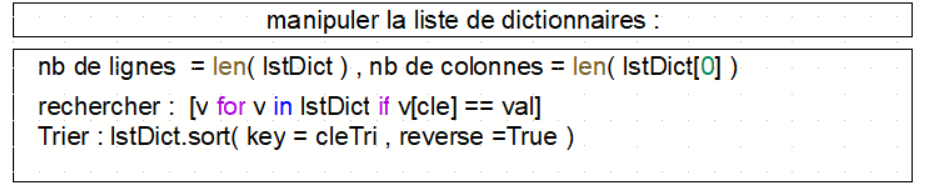

</center>

<font color="orange" size="5"><b><center>Quelques graphiques</center></b></font>

Gérer des grandes quantités de données, extraire des informations, effectuer des calculs etc...

C'est très bien, mais la présentation de grandes quantités de données demande souvent de recourir à des graphiques. 

Ci-dessous, quelques graphiques pour vous familiariser avec la librairie matplotlib.

[2125851, 2243833, 2211000]


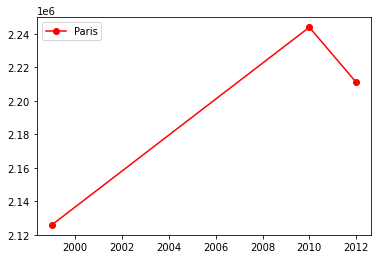

In [ ]:
# une courbe montrant la population de Paris en 1999, 2010 et 2012

# en abcisse :
annee = [1999,2010,2012]
# en ordonnée : créez la liste [n99,n2010,n2012] 
# avec le nombre d'hab chaque année à Paris
Paris = recherche(villes,'nom','Paris')[0]
habParis = [ Paris[c] for c in ['nb_hab_1999','nb_hab_2010','nb_hab_2012']]

# graphique
import matplotlib.pyplot as plt
plt.plot(annee, habParis, "ro-",label='Paris') 
# ro- signifie : (r)ed+(o)pen circle+(-)trait continu
plt.legend()

plt.show()

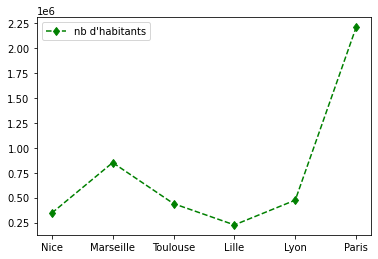

In [ ]:
# une courbe montrant le nombre d'ha des grandes villes
# en abcisse :
lstV = ['Paris','Lyon','Marseille','Lille','Toulouse','Nice']
nomVilles =  [ v['nom'] for v in villes if v['nom'] in lstV ]
# en ordonnée : créez la liste des nb ha de ces villes 
# avec le nombre d'hab chaque année à Paris
nb_hab = [ v['nb_hab_2012'] for v in villes if v['nom'] in lstV ]

# graphique
import matplotlib.pyplot as plt
plt.plot(nomVilles, nb_hab, "gd--",label='nb d\'habitants') 
plt.legend()
# gd-- signifie : (g)reeb+(d)iamonds + (--)trait pointillé
plt.show()

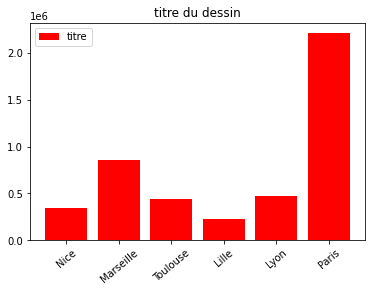

In [ ]:
# Un diagramme en baton serait plus indiqué :
x = [i for i in range(len(lstV))] # abcisses des batons
height = nb_hab # hauteur des batons
width = 0.8 # largeur des batons
names = nomVilles # etiquettes en abcisses
plt.bar(x, height, width, color='red' , label="titre") # dessine les batons

plt.xticks(x, names, rotation=40) # affiche les noms des villes
plt.legend()
plt.title('titre du dessin')
plt.show()

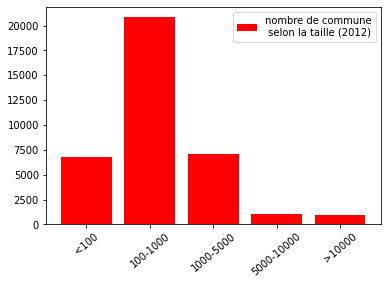

In [ ]:
# un autre :
n100 = len([v['nb_hab_2012'] for v in villes if v['nb_hab_2012'] <= 500])
n1000 = len([v['nb_hab_2012'] for v in villes if 500 <v['nb_hab_2012'] <= 1000])
n5000 = len([v['nb_hab_2012'] for v in villes if 1000 <v['nb_hab_2012'] <= 5000])
n10000 = len([v['nb_hab_2012'] for v in villes if 5000 <v['nb_hab_2012'] <= 10000])
nplus = len([v['nb_hab_2012'] for v in villes if 10000 <v['nb_hab_2012'] ])
x= [1,2,3,4,5]
names = ['<500','500-1000','1000-5000','5000-10000','>10000']
y = [n100,n1000,n5000,n10000,nplus]
plt.bar(x, y, width, color='red' , label="nombre de communes\n selon la taille (2012)") # dessine les batons
plt.xticks(x, names, rotation=40) # affiche les noms des villes
plt.legend()


<center>

---

*Auteurs* :  **Jean-Louis Thirot - Mireille Coilhac**

Publié sous licence CC BY-NC-SA


---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" width="200" src="https://s2.qwant.com/thumbr/700x0/f/9/436dcce5e02185c0b2e1b0e7a969aa81d7b0438d0a7f2eaee89abb9661b70b/cc-by-nc-sa.svg_.png?u=http%3A%2F%2Fopensiddur.org%2Fwp-content%2Fuploads%2F2011%2F03%2Fcc-by-nc-sa.svg_.png&q=0&b=1&p=0&a=1" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. 